In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

import os
import cv2


In [78]:
pip install opencv-python

In [2]:
from tensorflow.keras.utils import img_to_array

In [3]:

from tqdm import tqdm
np.random.seed(42)
noisy_data=[]


In [4]:
speckle_data=[]
path1 = "D://ALL_Output"
files=os.listdir(path1)
for i in tqdm(files):
    img=cv2.imread(path1+'/'+i,0) 
    img=cv2.resize(img,(64, 64))
    speckle_data.append(img_to_array(img))

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [08:18<00:00, 10.03it/s]


In [5]:
speckle_train = np.reshape(speckle_data, (len(speckle_data), 64, 64, 1))
speckle_train = speckle_train.astype('float32') / 255.

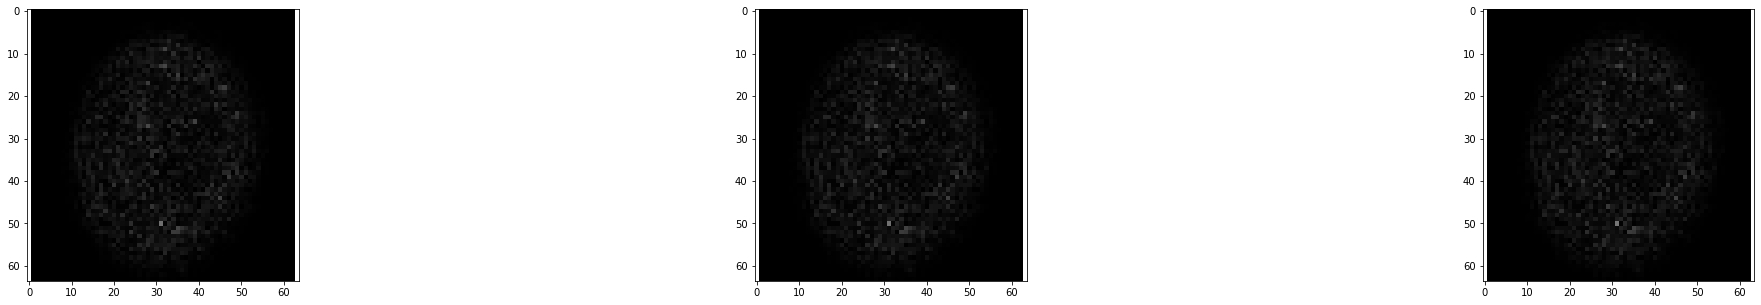

In [6]:
plt.figure(figsize=(50, 5))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(speckle_train[i].reshape(64, 64),cmap='gray')
plt.show()

In [7]:
len(speckle_train)
speckle_train.shape

(5000, 64, 64, 1)

In [8]:
clean_data=[]
path2 = "D://new"
files=os.listdir(path2)
for i in tqdm(files):
    img=cv2.imread(path2+'/'+i,0)  #Change 0 to 1 for color images
    img=cv2.resize(img,(64, 64))
    clean_data.append(img_to_array(img))




100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:00<00:00, 83.19it/s]


In [9]:
clean_train = np.reshape(clean_data, (len(clean_data), 64, 64, 1))
clean_train = clean_train.astype('float32') / 255

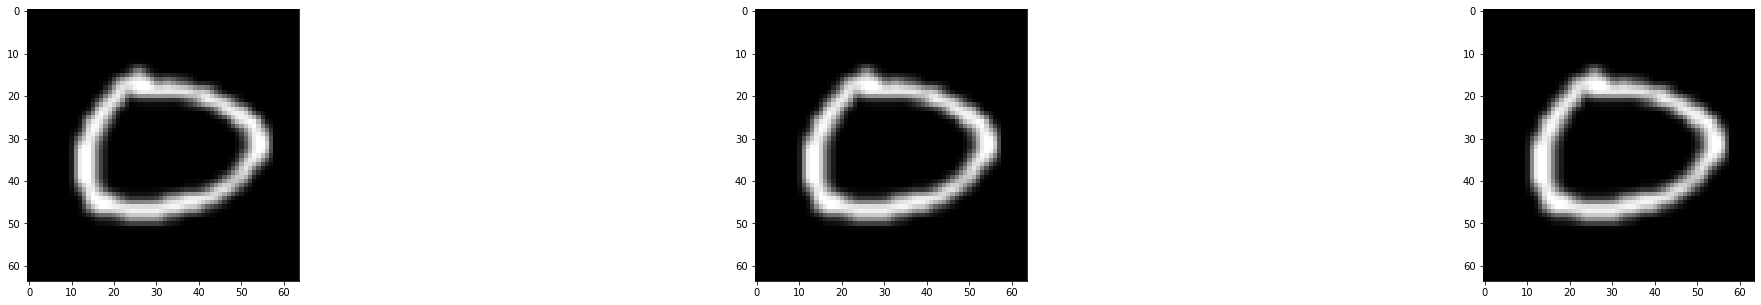

In [10]:

plt.figure(figsize=(50, 5))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(clean_train[i].reshape(64, 64), cmap="gray")
plt.show()

In [85]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 8)         2312      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 8)         584       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 8)         

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(speckle_train, clean_train, test_size = 0.20, random_state = 0)


model.fit(x_train, y_train, epochs=10, batch_size=8, shuffle=True, verbose = 1,
          validation_split = 0.1)

Epoch 1/10
450/450 [==============================] - 23s 47ms/step - loss: 0.0576 - accuracy: 0.7287 - val_loss: 0.0375 - val_accuracy: 0.7412
Epoch 2/10
450/450 [==============================] - 20s 44ms/step - loss: 0.0268 - accuracy: 0.7431 - val_loss: 0.0190 - val_accuracy: 0.7518
Epoch 3/10
450/450 [==============================] - 20s 44ms/step - loss: 0.0180 - accuracy: 0.7459 - val_loss: 0.0155 - val_accuracy: 0.7526
Epoch 4/10
450/450 [==============================] - 20s 45ms/step - loss: 0.0148 - accuracy: 0.7465 - val_loss: 0.0133 - val_accuracy: 0.7528
Epoch 5/10
450/450 [==============================] - 20s 44ms/step - loss: 0.0127 - accuracy: 0.7468 - val_loss: 0.0111 - val_accuracy: 0.7526
Epoch 6/10
450/450 [==============================] - 20s 45ms/step - loss: 0.0110 - accuracy: 0.7472 - val_loss: 0.0101 - val_accuracy: 0.7533
Epoch 7/10
450/450 [==============================] - 20s 45ms/step - loss: 0.0105 - accuracy: 0.7473 - val_loss: 0.0093 - val_accuracy:

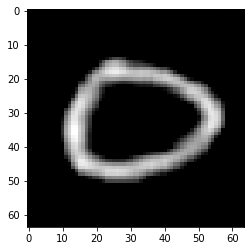

In [25]:
plt.imshow(no_noise_img[i].reshape(64,64), cmap="gray")

32/32 [==============================] - 1s 35ms/step


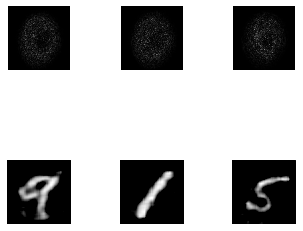

(-0.5, 63.5, 63.5, -0.5)

In [95]:
reconstructed_img = model.predict(x_test)

plt.figure(figsize=(40, 4))
for i in range(3,6):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(64, 64), cmap="gray")
    plt.axis("off")
    # display reconstructed  image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(reconstructed_img[i].reshape(64, 64), cmap="gray")
    plt.axis("off")
plt.axis("off")
plt.show()

ax = plt.subplot(3, 20, i + 1)


plt.imshow(x_test[i].reshape(64, 64), cmap="gray")
plt.imshow(x_test[i].reshape(64, 64), cmap="gray")
plt.axis("off")

In [62]:

img = Image.open("0.png")
img = Image.open("7.png")
img = Image.open("8.png")
img = Image.open("9.png")

img.show()

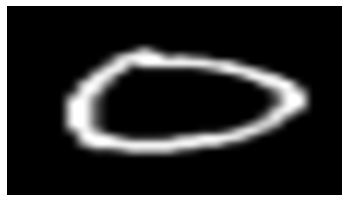

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('0.png')

imgplot = plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

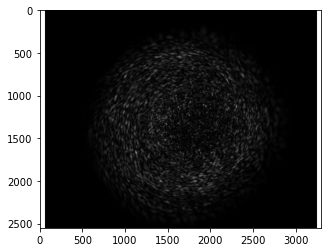

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('1_50_1_speckleimages_01.png')
imgplot = plt.imshow(img)
plt.show()